In [1]:
import lightkurve
from lightkurve import search_targetpixelfile


In [2]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download(quality_bitmask='hardest');


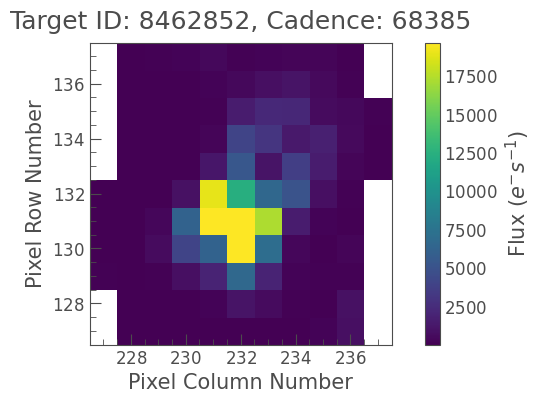

In [7]:
pixelfile.plot(frame=1000);

In [8]:
lc = pixelfile.to_lightcurve(aperture_mask='all');


In [9]:
lc.time, lc.flux


(<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.89718798 1557.9380561
  1557.95849016]>,
 <Quantity [258645.03, 258660.05, 258690.08, ..., 258929.86, 258884.66,
            258865.6 ] electron / s>)

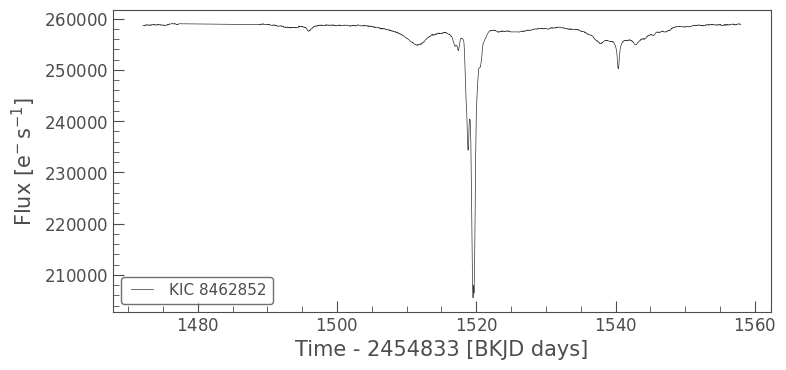

In [10]:
lc.plot();


In [11]:
pixelFile = search_targetpixelfile('KIC 6922244', quarter=4).download()


/home/marcelo/.local/lib/python3.8/site-packages/lightkurve/search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [12]:
lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)


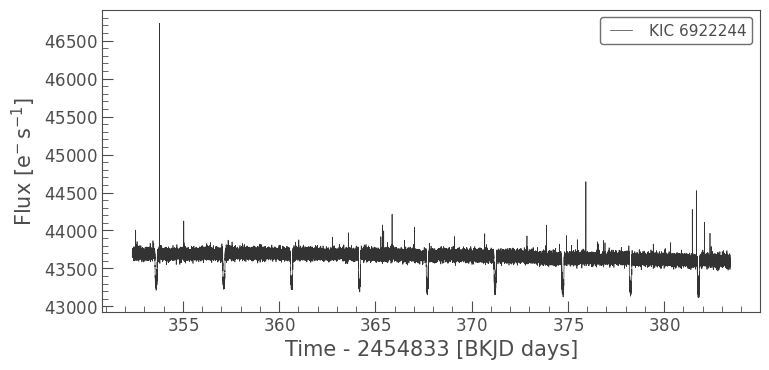

In [13]:
lc.plot();

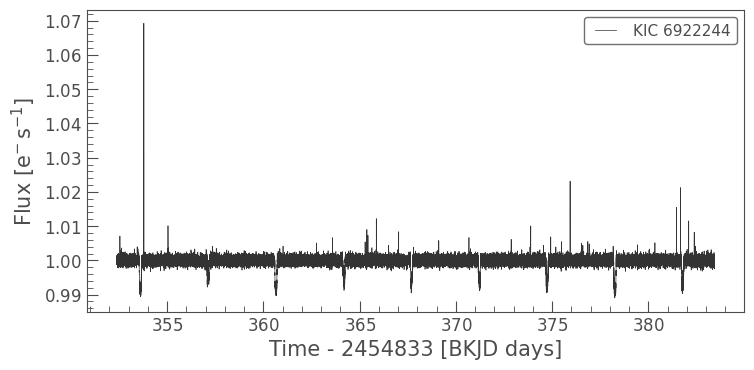

In [14]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();


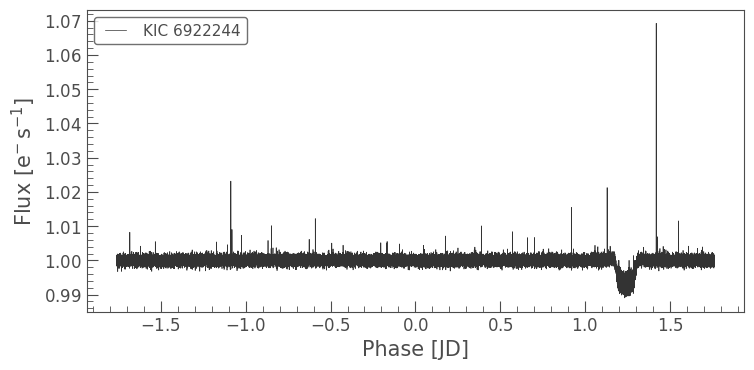

In [15]:
folded_lc = flat_lc.fold(period=3.522)
folded_lc.plot();


<ipython-input-16-1c8c31ee9084>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


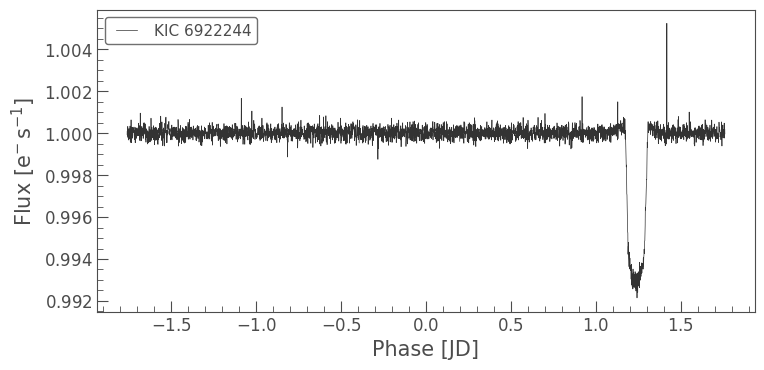

In [16]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot();


<ipython-input-17-bfa113d363b9>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot();


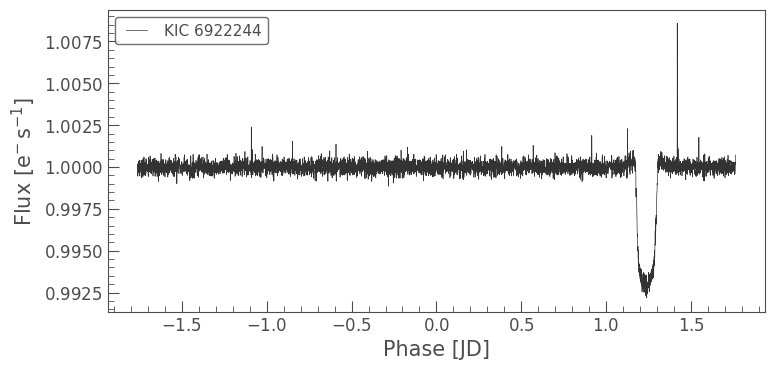

In [17]:
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot();


In [18]:
import numpy as np
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.3, 10, 0.001))
periodogram.plot();


ValueError: The maximum transit duration must be shorter than the minimum period

In [ ]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.5f}'.format(best_fit_period))


In [ ]:
tpf = search_targetpixelfile('EPIC 212593538', campaign=6).download()
lc = tpf.to_lightcurve(aperture_mask='all')
lc.plot();

In [ ]:
from lightkurve import search_targetpixelfile
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)
tpf = search_result.download(quality_bitmask='default')


In [ ]:
tpf.mission
tpf.targetid

In [ ]:
tpf.plot(aperture_mask=tpf.pipeline_mask);


In [ ]:
lc = tpf.to_lightcurve()
lc.scatter();

In [ ]:
aperture_mask = tpf.create_threshold_mask(threshold=10)
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.scatter();

In [ ]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();